In [48]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import scipy.constants as c
import sympy 

-0.4666666666666667
-0.04971751412429237


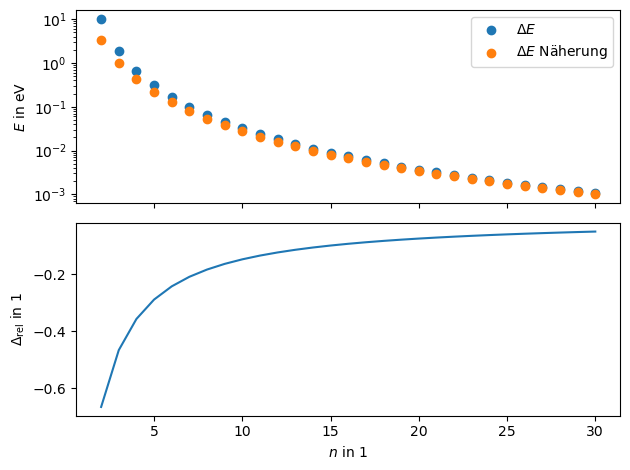

In [46]:
E = lambda n: -13.6 * (1/n**2 - 1/(n-1)**2)
Eprox = lambda n: 2*13.6 / n**3

N = np.arange(2,31)
En = [E(n) for n in N]
Eproxn = [Eprox(n) for n in N]
deltarel = np.divide(Eproxn,En)-1

fig,[ax1,ax2] = plt.subplots(2,1, sharex=True)
ax1.scatter(N,En, label="$\\Delta E$")
ax1.scatter(N,Eproxn, label="$\\Delta E$ Näherung")
ax1.legend()
ax1.set_yscale("log")
ax1.set_ylabel("$E$ in eV")
ax2.set_xlabel("$n$ in 1")

ax2.plot(N, deltarel, label="$\\Delta E_{\\text{rel}}$")
ax2.set_ylabel("$\\Delta_{\\text{rel}}$ in 1")

fig.tight_layout()
fig.savefig("En_vs_En_Näherung.svg")
print(deltarel[1])
print(deltarel[-1])

In [302]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.constants as c
from scipy.optimize import curve_fit
import pandas as pd
plt.style.use("default")
plt.rcParams.update({"xtick.top": True          , "ytick.right": True,
                     "xtick.minor.visible": True, "ytick.minor.visible": True,
                     'xtick.direction': "in"    , "ytick.direction": "in"})
plt.rcParams.keys()
# plt.style.use("seaborn-v0_8-poster")
# plt.style.use("dark_background")
# plt.style.available

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

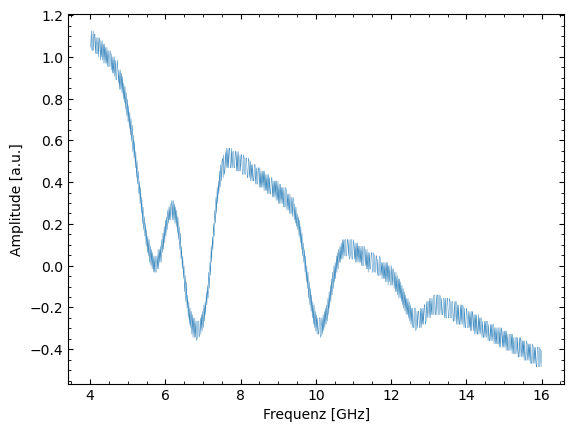

In [303]:
# (a)
df = pd.read_csv('DopplerfreieSpektroskopieRubidium.csv', skiprows=3)
[X,CH1,CH2,CH3] = np.array(df).T
X *= 0.016

plt.plot(X,CH1,linewidth=0.3)
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Amplitude [a.u.]")
plt.savefig("a.svg")

In [ ]:
# (b)

n  mu_n [GHz]  sigma_n [GHz]
----------------------------
0  5.67        0.362     
1  6.82        0.356     
2  10.1        0.337     
3  12.5        0.664     


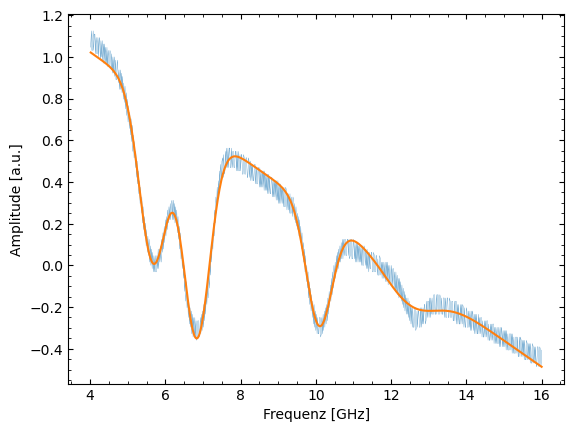

In [305]:
# (c)
def f(x,p0,p1,A1,A2,A3,A4,mu1,mu2,mu3,mu4,std1,std2,std3,std4):
    return p0 + p1*x + A1*stats.norm.pdf(x,mu1,std1) + A2*stats.norm.pdf(x,mu2,std2) + A3*stats.norm.pdf(x,mu3,std3) + A4*stats.norm.pdf(x,mu4,std4) 
p0 = [1.3,-1/10, 
      -.8,-1,-.7,-.3,
      5.5,6.8,10,12.7,
      .4, .4, .4, .4]

fit, cov = curve_fit(f, X, CH1, p0=p0)
mu, std = fit[6:10], fit[10:]

plt.plot(X,CH1,linewidth=0.2)
plt.plot(X, f(X, *fit))
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Amplitude [a.u.]")
plt.savefig("c.svg")

print(f"{"="*28}\n{"n":<3}{"mu_n [GHz]":12}{"sigma_n [GHz]":10}\n{"-"*28}")
for n, [mu_, std_] in enumerate(zip(mu,std)):
    print(f"{n:<3}{mu_:<12.3}{std_:<10.3}")
print("="*28)

# outputs:
# ============================
# n  mu_n [GHz]  sigma_n [GHz]
# ----------------------------
# 0  5.67        0.362     
# 1  6.82        0.356     
# 2  10.1        0.337     
# 3  12.5        0.664     
# ============================

In [ ]:
# (d)

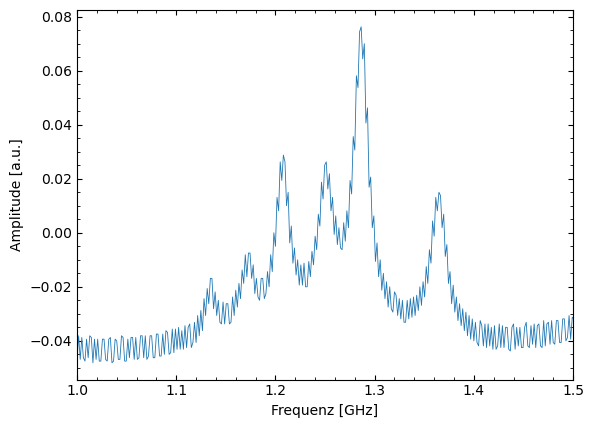

In [306]:
# (e)
df = pd.read_csv('DopplerfreieSpektroskopieHyperfineStruktur.csv', skiprows=3)
[X_,CH1_,CH2_] = np.array(df).T
X_ *= 0.0016

plt.plot(X_,CH1_,linewidth=0.6)
plt.xlim(1,1.5)
plt.xlabel("Frequenz [GHz]")
plt.ylabel("Amplitude [a.u.]")
plt.savefig("e.svg")

In [ ]:
# (f)

In [ ]:
# (g)